# Beginner Novice Eventing Incompleted Scores | Exploratory Data Analysis

This notebook will analyze the scores of beginner novice 3 day eventing competitors who did not complete the event.  It focuses on the scores of those who did not complet the competition.  There are several reasons a competitor could not complete, including a rider fall (RF), technical elimination (TE), or withdrawl (W) from the competition.  As each of these non-finishes are indicated by a letter, it is impossible to perform the same type of analysis on non-finishers, as the values for certain fields are not quantitative, but qualitative.  The scores of competitors who did finish have been analyzed in their own notebook [here](SchoegglJacquieMSDS692ExploratoryDataAnalysis).  The [machine learning notebook](SchoegglJacquieMSDS692MachineLearning.ipynb) also contains a comparison of dressage scores for competitors who completed and those that didn't.

First, we want to load all the necessary libraries and read in the data to be used.  We will show the first 6 entries in the table to see what the data looks like.  Additionally, we'll declare some variables that will be used througout the notebook.

In [52]:
#load libraries
library(Hmisc)
library(ggplot2)
library(dplyr)
#declare variables
divisionLabels <- c("Amateur", "Horse", "Junior", "Master", "Rider", "Youth")
eliminationLabels <- c("Elimination", "Mandatory Report (Horse Fall)", "Retire", "Rider Fall", "Tecnhical Elimination", "Withdrew")
numberOfCompetitorsLabel <- "Number of Competitors"
#read in files
incompletedScores <- read.csv(file="incompletedScores.csv", header=TRUE)
completedScores <- read.csv(file="scores.csv", header=TRUE)
head(incompletedScores)

Dr.Score,Place.after.Dr,XC.Jump,XC.Time,Total.after.XC,Place.after.XC,SJ.Jump,SJ.Time,Total.after.SJ,Final.Place,Year,Division
34.4,16,0,0,34.4,12,0,NA,NA,RF,2018,A
31.1,8,E,NA,NA,E,NA,NA,NA,E,2018,A
32.0,15,0,0,32.0,9,0,NA,NA,RF,2017,A
30.8,5,20,NA,NA,RF,NA,NA,NA,RF,2017,A
33.3,15,20,NA,NA,TE,0,4,NA,TE,2016,A
33.8,16,E,NA,NA,E,NA,NA,NA,E,2016,A


## Initial Analysis

Next, let's take a quick look at the total possible values for incompleted scores.  This will give us an idea of how many different types of elimination there are and how common they are.  The most common types of elimination are RF, meaning rider fall, and E, meaning that the competitor was eliminated for too many refusals.  Together, RF and E make up 60.4% of incomplete scores.

In [36]:
describe(incompletedScores$Final.Place)

incompletedScores$Final.Place 
       n  missing distinct 
      48        0        6 
                                              
Value          E    MR     R    RF    TE     W
Frequency     12     1     5    17     5     8
Proportion 0.250 0.021 0.104 0.354 0.104 0.167

Next let's look at the types of elimination grouped by Division.  We can see that the Junior division has the highest number of eliminations.  However, this doesn't mean that Juniors are more likely to be eliminated.  It's important to note that there are more entries in the Junior division than in others, which can explain the larger number of eliminations.  In order to find the group with the highest ratio of incompletes, we will need to combine the completed and incompleted data tables (see below).

The Horse division only has two types of eliminations: R (retired) and W (withdrew).  It is interesting to note because the Horse division is normally populated with more experienced riders.  It seems intuitive that there are no rider falls or technical eliminations in the Horse division because professional riders seem less likely to make those mistakes.

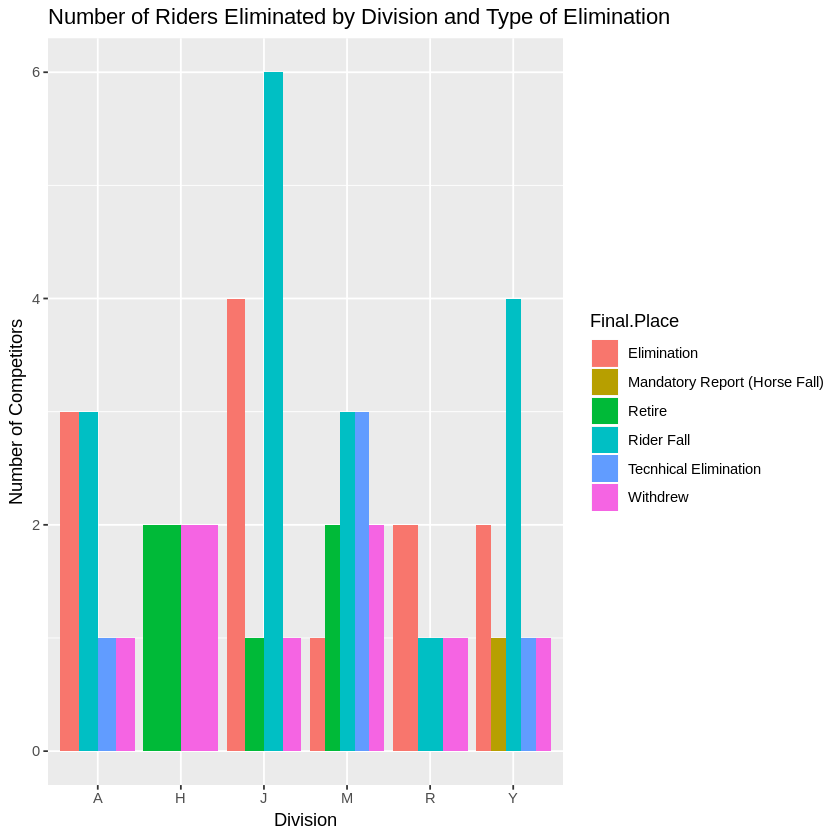

In [61]:
ggplot(incompletedScores, aes(x=factor(Division), fill=Final.Place))+
    geom_bar(position=position_dodge()) +
    scale_x_discrete("Division") + 
    scale_y_continuous(numberOfCompetitorsLabel) + 
    scale_fill_discrete(label=eliminationLabels) + 
        ggtitle("Number of Riders Eliminated by Division and Type of Elimination")


## Comparison of Proportion of Completed vs. Incompleted Scores

In order to see which division has the highest percentage of incompleted scores, we need to add another column to the data tables indicating whether or not the competitor completed.  Then, the incomplete scores and the complete scores can be combined into one single table.

The following lines add the new columns to the tables individually, then combine them together to create one master table.

In [56]:
#add new columns
incompletedScores["Completed"] <- FALSE
completedScores["Completed"]<- TRUE
#combine scores into one table
total <- rbind(completedScores, incompletedScores)
head(total)

Dr.Score,Place.after.Dr,XC.Jump,XC.Time,Total.after.XC,Place.after.XC,SJ.Jump,SJ.Time,Total.after.SJ,Final.Place,Year,Division,Completed
24.5,1,0,0.0,24.5,1,0,0,24.5,1,2018,A,TRUE
28.1,4,0,0.4,28.5,2,0,0,28.5,2,2018,A,TRUE
30.5,6,0,0.0,30.5,4,0,0,30.5,3,2018,A,TRUE
31.1,8,0,0.0,31.1,6,0,0,31.1,4,2018,A,TRUE
32.0,11,0,0.0,32.0,8,0,0,32.0,5,2018,A,TRUE
32.5,13,0,0.0,32.5,10,0,0,32.5,6,2018,A,TRUE


The bar plot below shows the percentage of completed and incompleted scores for each division.  We can see that the ratio of incomplete competitors is highest for the Master division at 13.9%.  The lowest is the Horse division at 5.5%.

Overall, the lowest entries are in the Rider Division.

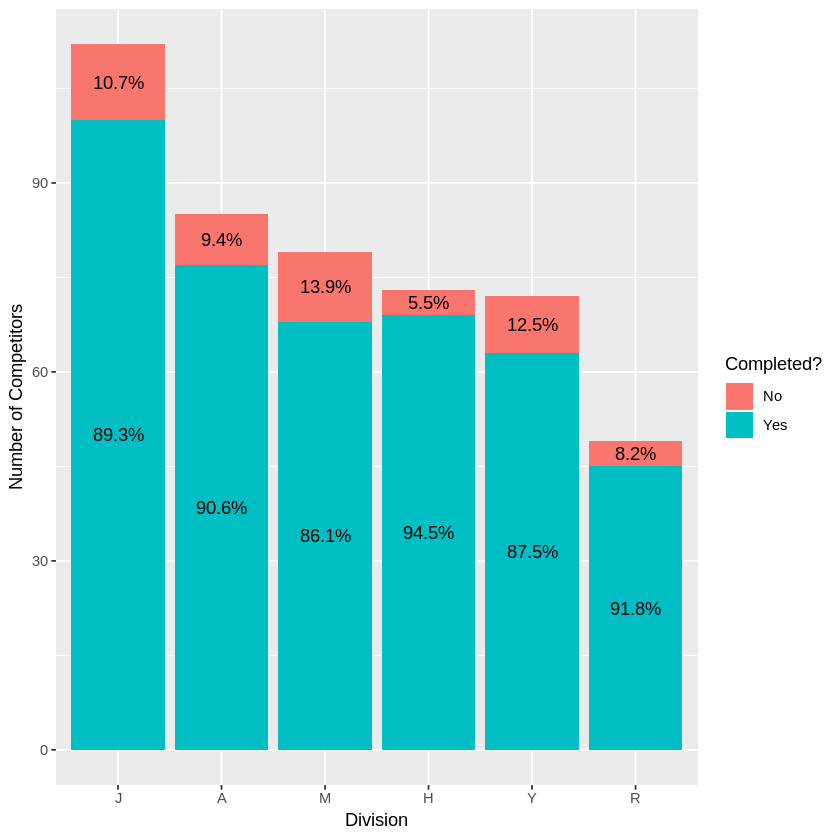

In [58]:
ggplot(total %>% count(Division, Completed) %>% group_by(Division) %>%
         mutate(percent=n/sum(n)),
         aes(reorder(Division, -n), n, fill=Completed)) +
       geom_bar(stat="identity") +
       geom_text(aes(label=paste0(sprintf("%1.1f", percent*100),"%")), 
            position=position_stack(vjust=0.5)) +
    scale_x_discrete("Division") + 
    scale_y_continuous(numberOfCompetitorsLabel) + 
        scale_fill_discrete(name="Completed?",
                           label=c("No", "Yes")) +
        ggtitle("Percentage of Riders who Completed by Division")



In order to see if the competition courses were fair from year-to-year, we can sort the percentage of incomplete competitors by year.  We can see that there were less entries in 2018 than in 2016 and 2017, and that the percentage of incompletes is lowest in 2018.  It would be interesting to continue to track the number of entries and the percentage of incompletes throughout the years.

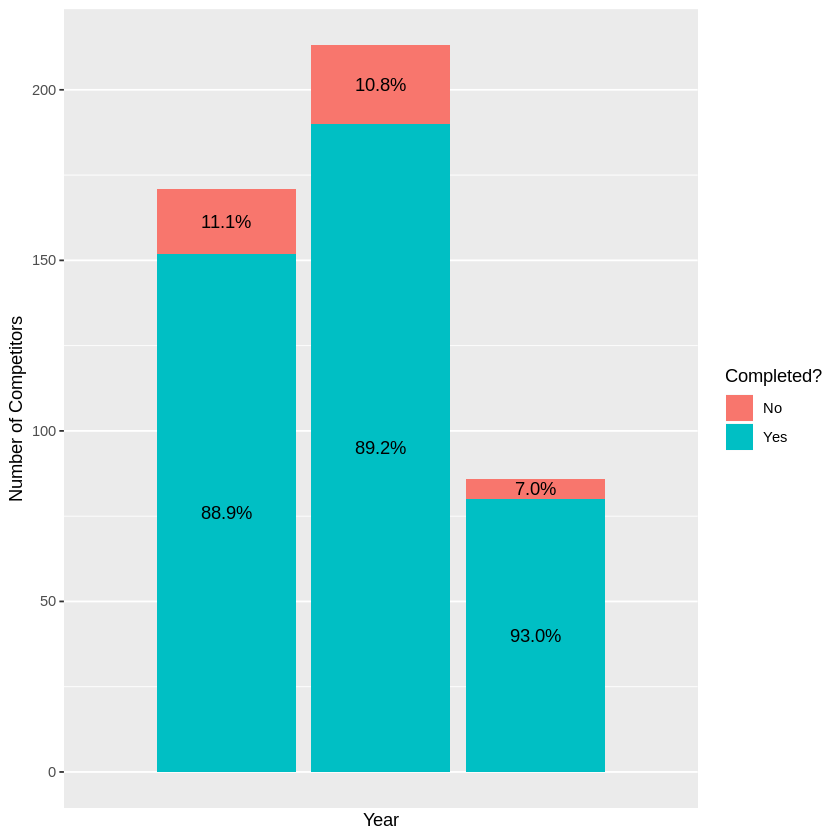

In [59]:
ggplot(total %>% count(Year, Completed) %>% group_by(Year) %>%
         mutate(percent=n/sum(n)),
         aes(Year, n, fill=Completed)) +
       geom_bar(stat="identity") +
       geom_text(aes(label=paste0(sprintf("%1.1f", percent*100),"%")), 
            position=position_stack(vjust=0.5)) + 
    scale_x_discrete("Year") + 
    scale_y_continuous(numberOfCompetitorsLabel) + 
        scale_fill_discrete(name="Completed?", label=c("No", "Yes"))

## Conclusion

This data does not hold as much information as the completed scores, but it is still important to analyze and compare.  It tells us import